In [1]:
# Import libraries# Impor 1.导入所有必需的包
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam_v2
from keras.preprocessing.image import ImageDataGenerator

from keras import utils as np_utils
from keras import callbacks
from sklearn.metrics import confusion_matrix

In [2]:
#2.从数据路径读取图像
#Define Datapath
data_path = r'D:\IE_Donwload\jaffe_class_ready\traning_set'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-angry

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-neutral

Loaded the images of dataset-sad

Loaded the images of dataset-surprise



(170, 128, 128, 3)

In [3]:
#3.定义类数
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:29]=0 #30
labels[30:59]=1 #29
labels[60:92]=2 #32
labels[93:124]=3 #31
labels[125:155]=4 #30
labels[156:187]=5 #31
labels[188:]=6 #30

names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

def getLabel(id):
    return ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE'][id]

In [4]:
#4.将类标签转换为one-hot编码
# convert class labels to on-hot encoding# conve 
#from keras import utils as np_utils
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [5]:
#5. CNN层集
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

# Feature Extraction
# model.add(Convolution2D(32,3,3, border_mode='same',input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(64, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Convolution2D(128, 3, 3))
# model.add(Activation('relu'))
# # model.add(Convolution2D(128, 3, 3))
# # model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

#new Code
model.add(Convolution2D(6, 5, 5, input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, 5, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(120, 5, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Classification
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

#Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [14]:
#6.查看模型配置
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         456       
                                                                 
 activation (Activation)     (None, 26, 26, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 16)          2416      
                                                                 
 activation_1 (Activation)   (None, 3, 3, 16)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 16)         0         
 2D)                                                    

True

In [6]:
#from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]

In [7]:
#7. 训练模型
# Training
hist = model.fit(X_train, y_train, batch_size=7, epochs=300, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/300
21/21 [==============================] - 1s 15ms/step - loss: 1.9298 - accuracy: 0.1875 - val_loss: 1.8818 - val_accuracy: 0.2308
Epoch 2/300
21/21 [==============================] - 0s 6ms/step - loss: 1.8673 - accuracy: 0.1875 - val_loss: 1.7798 - val_accuracy: 0.2308
Epoch 3/300
21/21 [==============================] - 0s 8ms/step - loss: 1.8211 - accuracy: 0.2431 - val_loss: 1.7697 - val_accuracy: 0.1923
Epoch 4/300
21/21 [==============================] - 0s 6ms/step - loss: 1.8319 - accuracy: 0.1875 - val_loss: 1.7887 - val_accuracy: 0.1923
Epoch 5/300
21/21 [==============================] - 0s 6ms/step - loss: 1.8153 - accuracy: 0.1458 - val_loss: 1.7788 - val_accuracy: 0.1538
Epoch 6/300
21/21 [==============================] - 0s 6ms/step - loss: 1.7970 - accuracy: 0.2361 - val_loss: 1.7642 - val_accuracy: 0.1923
Epoch 7/300
21/21 [==============================] - 0s 6ms/step - loss: 1.7881 - accuracy: 0.1944 - val_loss: 1.7652 - val_accuracy: 0.1923
Epoch 8/300


In [8]:
#Model Save
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

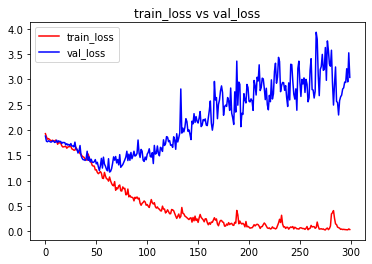

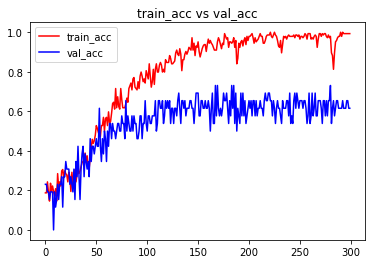

<Figure size 432x288 with 0 Axes>

In [9]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

Test Loss: 3.04164457321167
Test accuracy: 0.6153846383094788
(1, 128, 128, 3)
1/1 [==============================] - 0s 97ms/step
[[9.9999905e-01 9.8648309e-07 1.5445252e-33 1.8116902e-15 7.6847321e-18
  3.8327606e-22 4.9210303e-27]]
[0]
[[1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 20ms/step


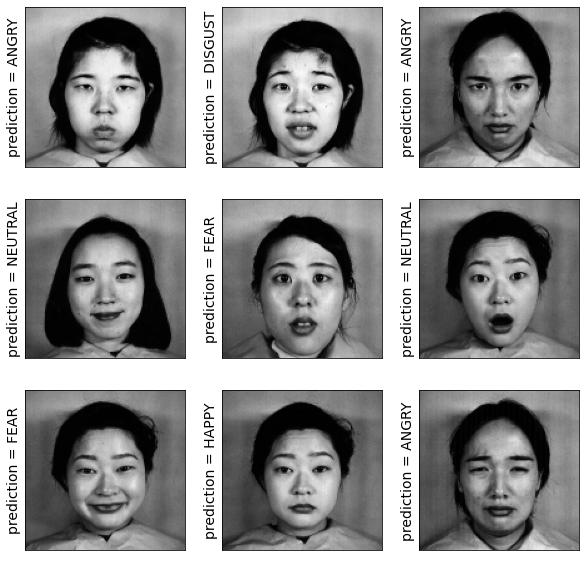

In [10]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

predict_x=model.predict(test_image) 
classes_x=np.argmax(predict_x,axis=1)
print(predict_x)
print(classes_x)

print(y_test[0:1])

predict_x=model.predict(X_test[:9]) 
res=np.argmax(predict_x,axis=1)

#res = model.predict_classes(X_test[:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()


1/1 [==============================] - 0s 26ms/step


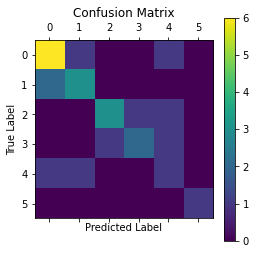

In [11]:
#from sklearn.metrics import confusion_matrix

predict_x=model.predict(X_test) 
results=np.argmax(predict_x,axis=1)


#results = model.predict_classes(X_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()